In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [13]:
X_test = pd.read_csv('data/processed/X_test.csv')
y_test = pd.read_csv('data/processed/y_test.csv').squeeze()

# Cargar modelo ganador
model = joblib.load('models/best_model.joblib')

In [14]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Crear DataFrame de resultados
results = X_test.copy()
results['actual'] = y_test
results['prediction'] = y_pred
results['probability'] = y_proba

results.head()

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,actual,prediction,probability
0,-0.088167,-0.237220,-0.938003,-0.246560,-0.411453,-0.25194,True,False,False,False,...,True,False,False,False,False,False,True,0,0,0.032081
1,0.288529,-0.323270,1.705471,-0.246560,-0.411453,-0.25194,False,False,False,False,...,True,False,False,False,False,False,True,0,0,0.045292
2,-0.935732,-0.330496,0.503892,0.721811,-0.411453,-0.25194,False,False,False,False,...,False,False,False,False,False,False,True,0,0,0.032383
3,-0.464863,-0.232294,0.864365,0.399020,-0.411453,-0.25194,True,False,False,False,...,True,False,False,False,False,False,True,0,0,0.036914
4,-0.653211,0.183506,-1.418634,-0.569351,-0.411453,-0.25194,False,False,False,False,...,False,False,False,False,False,False,True,0,0,0.116033


In [15]:
high_probability_customers = results[results['probability'] >= 0.7]

print(f"High-probability customers: {high_probability_customers.shape[0]}")

High-probability customers: 150


In [16]:
os.makedirs('data/processed', exist_ok=True)

high_probability_customers.to_csv(
    'data/processed/high_probability_customers.csv',
    index=False
)

In [17]:
type(model)

sklearn.ensemble._gb.GradientBoostingClassifier

In [18]:
feature_importance = pd.Series(
    model.feature_importances_,
    index=X_test.columns
).sort_values(ascending=False)

feature_importance.head(10)

poutcome_success    0.407592
age                 0.089027
contact_unknown     0.064774
day                 0.062931
pdays               0.062786
month_mar           0.047886
housing_yes         0.043811
month_oct           0.035814
month_jun           0.035750
balance             0.028760
dtype: float64

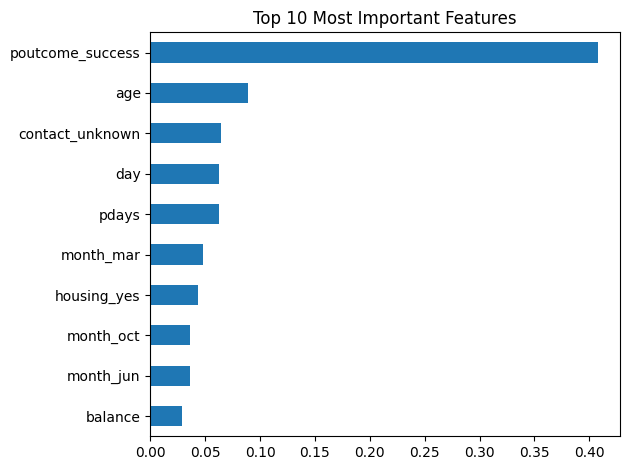

In [19]:
feature_importance.head(10).plot(kind='barh')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('visuals/feature_importance.png')
plt.show()


## Key Insights

- Customers contacted via cellular channels show a higher probability of subscribing to a term deposit.
- Previous campaign success strongly increases the likelihood of subscription.
- Balance and campaign frequency play a significant role in customer decision-making.
- Certain job and education segments respond better to marketing campaigns.

## Business Recommendations

- Focus future campaigns on customers with a predicted probability above 70%.
- Prioritize cellular contact methods for high-value customers.
- Reduce repeated contacts to customers with low predicted probability.
- Use predictive scores to optimize marketing costs and increase conversion rates.
